<H1><font color='#17202A'>ABC and XYZ Segmentation </font></H1>

ABC analysis is a good fundamental step, but its not adequate to understand the nature of our SKUs.

XYZ analysis is used to analyze the weighting of individual SKUs according to their consumption pattern. Here we calculate the demand fluctuation for each SKU, based on the fluctuation figure we assign three classes X, Y, Z.

To measure the fluctuation we use "Cofficient of variation" or CV

$ cv = \frac{Standard Deviation}{Mean} $


* Class X materials – characterized by a constant, non-changing usage over time.
* Class Y materials – The usage of these materials is neither constant or sporadic. With class Y materials, you can often observe trends.
* Class Z materials – These materials are not used regularly. The usage can fluctuate significantly or occur sporadically.

### Combining ABC and XYZ segmentation together

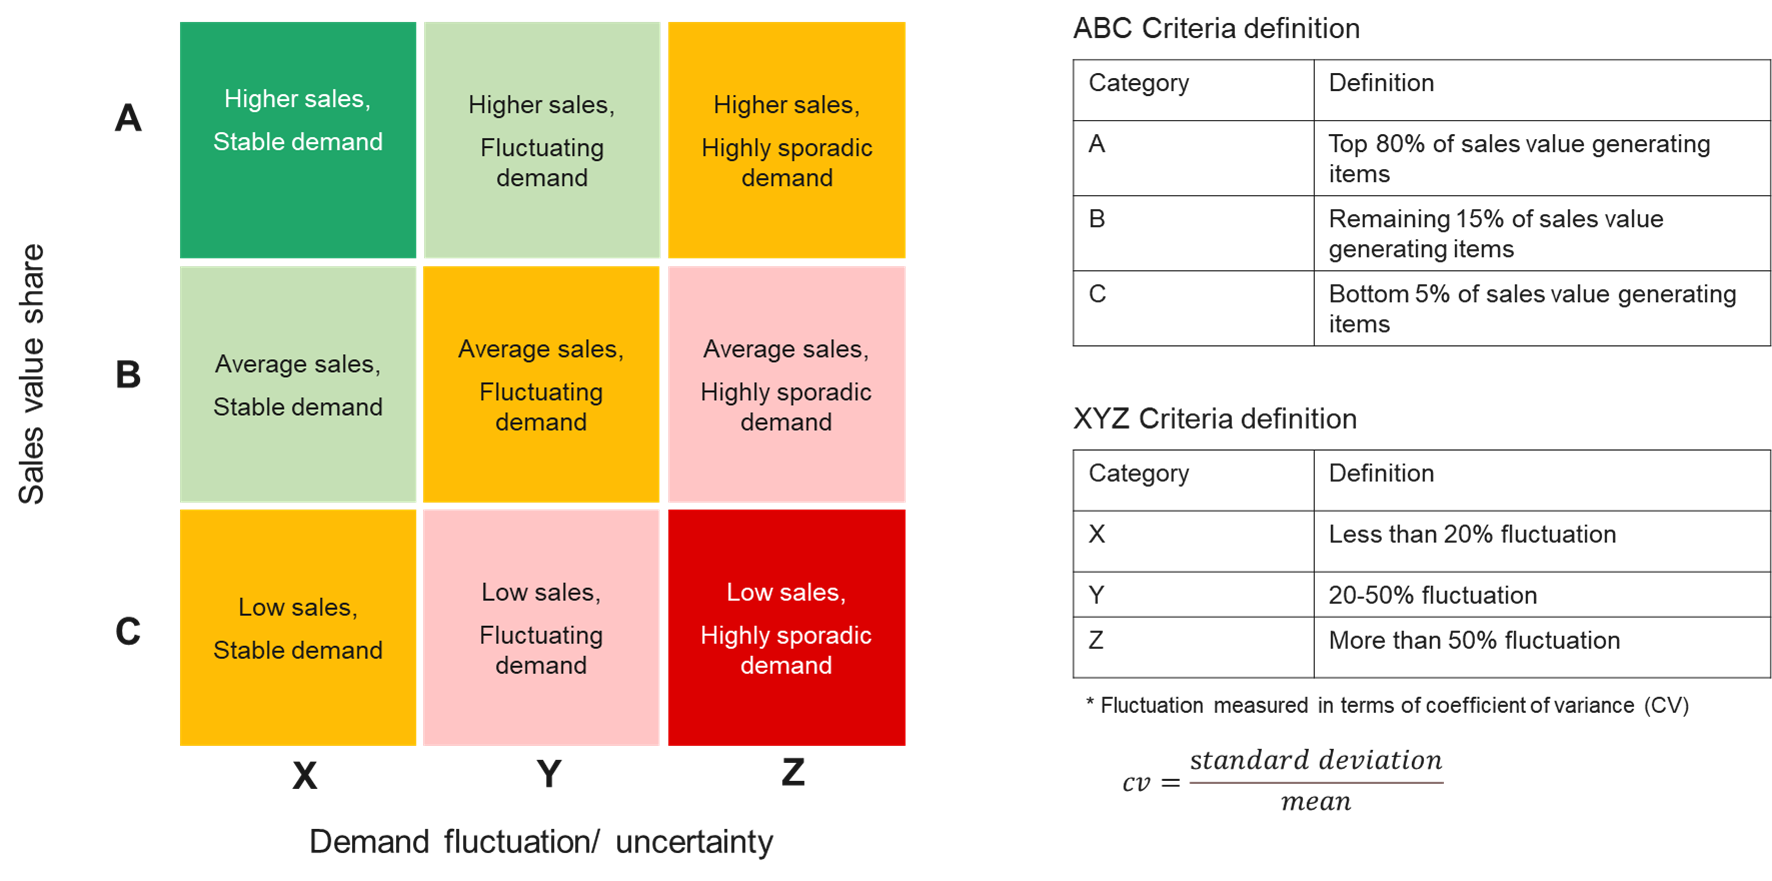

<H2><font color='#048E90'> Let's start the analysis!</font></H2>

In [15]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import random
pyo.init_notebook_mode()

In [3]:
df_sales = pd.read_csv("data\sales_data_2015.csv")
df_sales.head()

Unnamed: 0        item_id store_id        date  year  month  qty  \
0           0  HOBBIES_1_001     CA_1  2015-01-01  2015      1    0   
1           1  HOBBIES_1_001     CA_1  2015-01-02  2015      1    0   
2           2  HOBBIES_1_002     CA_1  2015-01-01  2015      1    0   
3           3  HOBBIES_1_002     CA_1  2015-01-02  2015      1    0   
4           4  HOBBIES_1_003     CA_1  2015-01-01  2015      1    0   

   sell_price  value  
0        8.26    0.0  
1        8.26    0.0  
2        3.97    0.0  
3        3.97    0.0  
4        2.97    0.0

#### 1. Split the data by store 

In [4]:
df_sales_ca1 = df_sales[df_sales['store_id']=='CA_1'].reset_index(drop=True)
df_sales_ca1.head()

Unnamed: 0        item_id store_id        date  year  month  qty  \
0           0  HOBBIES_1_001     CA_1  2015-01-01  2015      1    0   
1           1  HOBBIES_1_001     CA_1  2015-01-02  2015      1    0   
2           2  HOBBIES_1_002     CA_1  2015-01-01  2015      1    0   
3           3  HOBBIES_1_002     CA_1  2015-01-02  2015      1    0   
4           4  HOBBIES_1_003     CA_1  2015-01-01  2015      1    0   

   sell_price  value  
0        8.26    0.0  
1        8.26    0.0  
2        3.97    0.0  
3        3.97    0.0  
4        2.97    0.0

#### 2. Prepare time series data (by week)

In [5]:
# Add week number
df_sales_ca1['week']=pd.to_datetime(df_sales_ca1['date']).dt.strftime('%W')

In [6]:
# Get weekly sales volume timeseries
df_sales_ca1_volume = pd.pivot_table(df_sales_ca1,index=['item_id'], values=['qty'],columns=['week'],
                               aggfunc={'qty':np.sum}).reset_index()

In [7]:
df_sales_ca1_volume.head()

item_id   qty                                                     \
week                 00    01    02    03    04     05     06    07     08   
0     FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0   
1     FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0   
2     FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0   
3     FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0   
4     FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0   

      ...                                                            
week  ...    43    44    45    46   47   48    49    50    51    52  
0     ...   3.0   3.0   4.0  10.0  6.0  4.0  13.0   3.0   4.0   2.0  
1     ...   0.0   2.0   2.0   3.0  2.0  1.0   5.0   5.0   2.0   3.0  
2     ...   7.0   5.0   3.0   2.0  3.0  5.0   8.0   6.0   0.0   0.0  
3     ...  51.0  34.0  23.0  22.0  9.0  0.0   2.0   0.0  94.0  19.0  
4     ...  13.0   5.0   9.0   7.0  9.0  7.0  12.0  32.0  16.0   4.0  

[5 rows x 54 columns]

In [8]:
col_name = ['item_id',*range(0,53,1)]

In [9]:
df_sales_ca1_volume.columns = col_name

In [10]:
df_sales_ca1_volume.head()

item_id     0     1     2     3     4      5      6     7      8  ...  \
0  FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0  ...   
1  FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0  ...   
2  FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0  ...   
3  FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0  ...   
4  FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0  ...   

     43    44    45    46   47   48    49    50    51    52  
0   3.0   3.0   4.0  10.0  6.0  4.0  13.0   3.0   4.0   2.0  
1   0.0   2.0   2.0   3.0  2.0  1.0   5.0   5.0   2.0   3.0  
2   7.0   5.0   3.0   2.0  3.0  5.0   8.0   6.0   0.0   0.0  
3  51.0  34.0  23.0  22.0  9.0  0.0   2.0   0.0  94.0  19.0  
4  13.0   5.0   9.0   7.0  9.0  7.0  12.0  32.0  16.0   4.0  

[5 rows x 54 columns]

In [11]:
df_sales_ca1_t = pd.melt(df_sales_ca1_volume, id_vars=['item_id'],var_name='week',value_name='qty' )

In [12]:
df_sales_ca1_t.head()

item_id week   qty
0  FOODS_1_001    0   2.0
1  FOODS_1_002    0   0.0
2  FOODS_1_003    0   0.0
3  FOODS_1_004    0  52.0
4  FOODS_1_005    0   0.0

In [13]:
def plot_item_demand(df,item):
    df1 = df[df['item_id']==item]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1['week'],y=df1['qty'],mode='lines'))
    
    fig.update_layout(
        title=item,
        xaxis_title='Week',
        yaxis_title='Sales Quantity',
    )
    return fig

In [16]:
fig_FOODS_1_001 = plot_item_demand(df_sales_ca1_t,'FOODS_1_004')
fig_FOODS_1_001.show()

#### 3. Add key statistics to the data
Here we will add :  Mean, Standard Deviation and Cofficient of Deviation

In [17]:
#Add the week column names to a list 
cols = df_sales_ca1_volume.columns.tolist()
periods = cols[1:54]

In [18]:
# Add parameters (zero values not excluded)
df_sales_ca1_volume['total_demand'] = df_sales_ca1_volume[periods].sum(axis=1)
df_sales_ca1_volume['mean'] = df_sales_ca1_volume[periods].mean(axis=1)
df_sales_ca1_volume['std'] = df_sales_ca1_volume[periods].std(axis=1)
df_sales_ca1_volume['cv'] = (df_sales_ca1_volume['std']/df_sales_ca1_volume['mean'])*100

In [19]:
# Add parameters (excluded zero entries when calculating meand and std)
df_sales_ca1_volume['total_demand'] = df_sales_ca1_volume[periods].sum(axis=1)
df_sales_ca1_volume['mean'] = df_sales_ca1_volume[periods].replace(0,np.NaN).mean(axis=1)
df_sales_ca1_volume['std'] = df_sales_ca1_volume[periods].replace(0,np.NaN).std(axis=1)
df_sales_ca1_volume['cv'] = (df_sales_ca1_volume['std']/df_sales_ca1_volume['mean'])*100

In [20]:
df_sales_ca1_volume.head()

item_id     0     1     2     3     4      5      6     7      8  ...  \
0  FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0  ...   
1  FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0  ...   
2  FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0  ...   
3  FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0  ...   
4  FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0  ...   

    47   48    49    50    51    52  total_demand       mean        std  \
0  6.0  4.0  13.0   3.0   4.0   2.0         231.0   4.442308   2.725432   
1  2.0  1.0   5.0   5.0   2.0   3.0         158.0   3.160000   1.608143   
2  3.0  5.0   8.0   6.0   0.0   0.0         254.0   5.183673   2.643179   
3  9.0  0.0   2.0   0.0  94.0  19.0        4329.0  84.882353  45.291786   
4  9.0  7.0  12.0  32.0  16.0   4.0         362.0   7.541667   5.783168   

          cv  
0  61.351713  
1  50.890587  
2  50.990459  
3  53.358306  
4  76.682894  

[5 rows x 58 columns]

#### 4. Add XYZ categories based on CV

In [21]:
#xyz thresholds
X = 25 
Y = 50

In [22]:
df_sales_ca1_volume['xyz'] = df_sales_ca1_volume['cv'].apply(lambda x:(x < X and "X") or (x < Y and "Y") or "Z")


In [23]:
df_sales_ca1_volume.head()

item_id     0     1     2     3     4      5      6     7      8  ...  \
0  FOODS_1_001   2.0  10.0   1.0   5.0   4.0    2.0   10.0   3.0    2.0  ...   
1  FOODS_1_002   0.0   2.0   4.0   4.0   3.0    6.0    4.0   5.0    1.0  ...   
2  FOODS_1_003   0.0   5.0   3.0   4.0   4.0    5.0    4.0   5.0    1.0  ...   
3  FOODS_1_004  52.0  61.0  59.0  88.0  82.0  116.0  120.0  16.0  113.0  ...   
4  FOODS_1_005   0.0   2.0   4.0   1.0   2.0    0.0    2.0   1.0    1.0  ...   

    48    49    50    51    52  total_demand       mean        std         cv  \
0  4.0  13.0   3.0   4.0   2.0         231.0   4.442308   2.725432  61.351713   
1  1.0   5.0   5.0   2.0   3.0         158.0   3.160000   1.608143  50.890587   
2  5.0   8.0   6.0   0.0   0.0         254.0   5.183673   2.643179  50.990459   
3  0.0   2.0   0.0  94.0  19.0        4329.0  84.882353  45.291786  53.358306   
4  7.0  12.0  32.0  16.0   4.0         362.0   7.541667   5.783168  76.682894   

   xyz  
0    Z  
1    Z  
2    Z  
3    Z  
4    Z  

[5 rows x 59 columns]

#### 5.Prepare summary statistics

In [24]:
df_xyz_summary = pd.pivot_table(df_sales_ca1_volume, index=['xyz'], values=['item_id'],
                               aggfunc={'item_id':np.count_nonzero}).reset_index()

In [25]:
df_xyz_summary

xyz  item_id
0   X       50
1   Y     1440
2   Z     1557

In [26]:
fig_xyz_summary = px.scatter(df_sales_ca1_volume, x="mean", y="std",color='xyz',size='total_demand',title='Mean and Standard Deviation of XYZ items',hover_data=['item_id'],template='presentation')
fig_xyz_summary.show()

<H2><font color='#048E90'> Let's perform ABC and XYZ together</font></H2>

In [27]:
def abc_analysis_by_store(df,store, a, b):
    #split the store data from main dataframe
    df_storei = df[df['store_id']==store]
    
    #Caclculate the value for each item in the perticular store
    df_storei = df_storei.groupby(['item_id'],as_index=False)['value'].sum()
    
    #Sort the values in descending order
    df_storei = df_storei.sort_values(by=['value'],ascending=False).reset_index(drop=True)
    
    #Calculate the percentage share by item
    df_storei['perc'] = df_storei.value/df_storei['value'].sum()*100
    
    #Calculate the cumulative percentage share
    df_storei['cumu'] = df_storei['perc'].cumsum()
    
    #Add ABC categories based on predefined rules
    df_storei['abc'] = df_storei['cumu'].apply(lambda x: (x <= a and "A") or (x <= a + b and "B") or "C")
    
    #Calculate summary statistics
    df_abc_summary = pd.pivot_table(df_storei, index=['abc'], values=['perc', 'value', 'item_id'], 
                                aggfunc={'perc': np.sum, 'value': np.sum, 'item_id': np.count_nonzero}).reset_index()
    
    df_abc_summary['item_perc'] = df_abc_summary.item_id/df_abc_summary['item_id'].sum()*100
    
    return df_storei, df_abc_summary

#### 6. Lets convert XYZ analysis into a python function

In [28]:
def xyz_analysis_by_store(df,store,x,y):
    #split by store
    df1 = df[df['store_id']==store].reset_index(drop=True)
    
    # Add week number
    df1['week']=pd.to_datetime(df1['date']).dt.strftime('%W')
    
    # Get weekly sales volume timeseries
    df2 = pd.pivot_table(df1,index=['item_id'], values=['qty'],columns=['week'],
                               aggfunc={'qty':np.sum}).reset_index()
    
    # Rename columns to convert the pivot table structure
    col_name = ['item_id',*range(0,53,1)]
    df2.columns = col_name
    
    #Tranform timeseries data for visualization
    df_t = pd.melt(df2, id_vars=['item_id'],var_name='week',value_name='qty' )
    
    #Add the week column names to a list 
    periods = col_name[1:54]
    
    # Add parameters (zero values not excluded)
    df2['total_demand'] = df2[periods].sum(axis=1)
    df2['mean'] = df2[periods].mean(axis=1)
    df2['std'] = df2[periods].std(axis=1)
    df2['cv'] = (df2['std']/df2['mean'])*100
    
    # Add xyz categories
    df2['xyz'] = df2['cv'].apply(lambda x:(x < X and "X") or (x < Y and "Y") or "Z")

    df_xyz_summary = pd.pivot_table(df2, index=['xyz'], values=['item_id'],
                               aggfunc={'item_id':np.count_nonzero}).reset_index()
    
    return df2, df_xyz_summary, df_t

In [29]:
# Run the XYZ function
df_xyz_ca1, df_xyz_ca1_summary, df_ca1_t = xyz_analysis_by_store(df_sales,'CA_1',25,50)

#### 7. Lets run ABC and XYZ together

In [30]:
def abc_and_xyz(df,store, a, b, x, y):
    df_abc, df_abc_summary = abc_analysis_by_store(df,store, a, b)
    df_xyz, df_xyz_summary, df_xyz_t = xyz_analysis_by_store(df,store,x,y)
    
    df_segment = pd.merge(df_abc, df_xyz[['item_id','total_demand','mean','std','cv','xyz']], 
                          left_on='item_id',right_on='item_id').reset_index(drop=True)
    
    df_segment['category'] = df_segment['abc']+df_segment['xyz']
    
    df_segment_summary = pd.pivot_table(df_segment,index=['category','abc','xyz'], values=['value','item_id'],
                               aggfunc={'value':np.sum, 'item_id':np.count_nonzero}).reset_index()
    df_segment_summary.rename(columns = {'item_id':'number_of_items'}, inplace = True)
    
    return df_segment, df_segment_summary, df_abc, df_abc_summary, df_xyz, df_xyz_summary, df_xyz_t
    

In [31]:
df_segment, df_segment_summary, df_abc, df_abc_summary, df_xyz, df_xyz_summary, df_xyz_t = abc_and_xyz(df_sales,'CA_3',80, 15, 25,50)

In [32]:
df_segment.head()

item_id      value      perc      cumu abc  total_demand  \
0      FOODS_3_120  157358.04  2.230730  2.230730   A       31598.0   
1    HOBBIES_1_354   53722.80  0.761582  2.992312   A        2360.0   
2      FOODS_3_090   49303.40  0.698932  3.691244   A       33279.0   
3      FOODS_3_586   45010.56  0.638076  4.329320   A       26792.0   
4  HOUSEHOLD_1_053   36272.31  0.514201  4.843521   A        2423.0   

         mean         std         cv xyz category  
0  596.188679  170.746782  28.639722   Y       AY  
1   44.528302   10.259337  23.040036   X       AX  
2  627.905660  368.704398  58.719712   Z       AZ  
3  505.509434   92.665574  18.331126   X       AX  
4   45.716981   13.396867  29.303919   Y       AY

In [50]:
df_segment.sort_values(by=['cv'])

item_id     value      perc        cumu abc  total_demand  \
118       FOODS_3_080   9030.00  0.128011   29.011785   A        5375.0   
83        FOODS_3_694  11047.68  0.156613   24.001605   A        6576.0   
15    HOUSEHOLD_1_535  24861.99  0.352447    9.297754   A        3567.0   
35    HOUSEHOLD_1_040  17514.13  0.248283   14.897299   A        3623.0   
30        FOODS_3_555  17930.64  0.254187   13.645301   A       10673.0   
...               ...       ...       ...         ...  ..           ...   
3041  HOUSEHOLD_1_020      0.00  0.000000  100.000000   C           0.0   
3042  HOUSEHOLD_1_035      0.00  0.000000  100.000000   C           0.0   
3043  HOUSEHOLD_1_356      0.00  0.000000  100.000000   C           0.0   
3044    HOBBIES_1_112      0.00  0.000000  100.000000   C           0.0   
3045  HOUSEHOLD_1_405      0.00  0.000000  100.000000   C           0.0   

            mean        std         cv xyz category  
118   101.415094  15.947551  15.725027   X       AX  
83    124.075472  20.520017  16.538335   X       AX  
15     67.301887  11.133085  16.542010   X       AX  
35     68.358491  12.183050  17.822292   X       AX  
30    201.377358  36.053500  17.903453   X       AX  
...          ...        ...        ...  ..      ...  
3041    0.000000   0.000000        NaN   Z       CZ  
3042    0.000000   0.000000        NaN   Z       CZ  
3043    0.000000   0.000000        NaN   Z       CZ  
3044    0.000000   0.000000        NaN   Z       CZ  
3045    0.000000   0.000000        NaN   Z       CZ  

[3046 rows x 11 columns]

In [33]:
df_segment_summary

category abc xyz  number_of_items       value
0       AX   A   X               57   642347.51
1       AY   A   Y              584  3024889.23
2       AZ   A   Z              496  1975336.45
3       BX   B   X                2     2455.07
4       BY   B   Y              242   294716.68
5       BZ   B   Z              700   760978.50
6       CY   C   Y               31    16932.05
7       CZ   C   Z              934   336450.23

In [34]:
fig_summary_bar = px.bar(df_segment_summary, x='xyz',color='xyz', y='value', barmode='group',
                        facet_col='abc', template='presentation')
fig_summary_bar.show()

In [35]:
fig_scatter = px.scatter(df_segment, x="cumu", y="cv",color='category',template='presentation')
fig_scatter.show()

#### Samples from each category and the demand pattern

#### STEPS here...
1. Pick random items under each category (AX, AY, etc.)
2. Get the weekly demand data for each of the selected items
3. Map demand patterns of each item in a chart
4. Put it all together in a grid
5. Add mean line
6. Add rectancle to show +25% to -25% from mean


In [36]:
def plot_charts_for_random_item_in_each_category(df_segment,df_xyz_t):
    categories = ['AX','AY','AZ','BX','BY','BZ','CX','CY','CZ']
    items = []
    frames = []
    mean = []
    item_name = []
    for i in categories:
        if len(df_segment[df_segment['category']==i]['item_id'].unique().tolist())>0:
                item = random.choice(df_segment[df_segment['category']==i]['item_id'].unique().tolist())
                df = df_xyz_t[df_xyz_t['item_id']==item]
                df['category'] = i
                frames.append(df)
                mean.append(df['qty'].mean())
        else:
            df_empty = pd.DataFrame(data={'item_id':'','week':'','qty':'','category':i},index=[0]) 
            frames.append(df_empty)
            mean.append(0)
        
    df_output = pd.concat(frames).reset_index(drop=True)
    
    #Draw chart
    fig = px.line(df_output, x='week', y='qty',
                facet_col='category',facet_col_wrap=3,
              category_orders = {'category':['AX','AY','AZ','BX','BY','BZ','CX','CY','CZ']}, template='plotly_white')
    
    # Add average line
    k = 0
    for r in range(3):
        for c in range(1,4):
            row = 3-r
            col = c
            mean_value = mean[k]
            k = k + 1
            fig.add_hline(y=mean_value, line_dash="dot", row=row, col=col,annotation_text="mean",annotation_position="bottom right")
            fig.add_hrect(y0=mean_value*0.75,y1=mean_value*1.25,fillcolor="green", opacity=0.10, line_width=0,row=row, col=col)
    
    #Add boxplot chart
    fig_box_plot = px.box(df_output, x="category", y="qty", color="category",template='presentation')
    fig_box_plot.update_layout(xaxis={'categoryorder':'category ascending'})
    
    return df_output, fig, fig_box_plot

In [37]:
df_output, fig_category_example, fig_box_plot = plot_charts_for_random_item_in_each_category(df_segment,df_xyz_t)
fig_category_example.show()

<ipython-input-36-1172d36d4562>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
fig_box_plot.show()

In [39]:
def plot_charts_for_random_item_in_each_category(df_segment,df_xyz_t):
    categories = ['AX','AY','AZ','BX','BY','BZ','CX','CY','CZ']
    
    def populate_chart_for_cat (df_segment,df_xyz_t,i):
        if len(df_segment[df_segment['category']==i]['item_id'].unique().tolist())>0:
            item = random.choice(df_segment[df_segment['category']==i]['item_id'].unique().tolist())
            df = df_xyz_t[df_xyz_t['item_id']==item]
            fig1 = px.line(df,x='week',y='qty',title=i + '_' + item,template='presentation')
            
            mean = df['qty'].mean()
            std = df['qty'].std()
            y0 = mean*0.75
            y1 = mean*1.25
            
            fig1.add_hline(y=mean, line_dash="dot", annotation_text="average",annotation_position="bottom right")
            fig1.add_hrect(y0=y0,y1=y1,fillcolor="green", opacity=0.25, line_width=0, annotation_text="mean +/- 25% ", annotation_position="top right",)
        else:
            fig1 = px.line(title=i + '_No items found',template='presentation')

        return fig1
               
    #populate charts
    fig_ax = populate_chart_for_cat (df_segment,df_xyz_t,'AX')
    fig_ay = populate_chart_for_cat (df_segment,df_xyz_t,'AY')
    fig_az = populate_chart_for_cat (df_segment,df_xyz_t,'AZ')
    fig_bx = populate_chart_for_cat (df_segment,df_xyz_t,'BX')
    fig_by = populate_chart_for_cat (df_segment,df_xyz_t,'BY')
    fig_bz = populate_chart_for_cat (df_segment,df_xyz_t,'BZ')
    fig_cx = populate_chart_for_cat (df_segment,df_xyz_t,'CX')
    fig_cy = populate_chart_for_cat (df_segment,df_xyz_t,'CY')
    fig_cz = populate_chart_for_cat (df_segment,df_xyz_t,'CZ')
    
    return fig_ax,fig_ay,fig_az,fig_bx,fig_by,fig_bz,fig_cx,fig_cy,fig_cz

In [40]:
fig_ax,fig_ay,fig_az,fig_bx,fig_by,fig_bz,fig_cx,fig_cy,fig_cz = plot_charts_for_random_item_in_each_category(df_segment,df_xyz_t)

In [41]:
fig_ax.show()

In [42]:
fig_ay.show()

In [43]:
fig_az.show()

In [44]:
fig_bx.show()

In [45]:
fig_by.show()

In [46]:
fig_bz.show()

In [47]:
fig_cx.show()

In [48]:
fig_cy.show()

In [49]:
fig_cz.show()